In [9]:
# import /Users/rishabjain/Desktop/Research/choformer/expression/data/dna/OneOmics_CHO_Global_Spectral_Library.txt

import pandas as pd
import numpy as np
import os

def read_data(file_path):
    data = pd.read_csv(file_path, sep = '\t')
    return data

df = read_data('/Users/rishabjain/Desktop/Research/choformer/expression/data/dna/OneOmics_CHO_Global_Spectral_Library.txt')

df.head()

,uniprot_id,protein_name,isotype,ce,stripped_sequence,modification_sequence,rt_detected,irt,confidence,prec_z,...,prec_y,triggered_rt,n,use,shared,mods,nterm,cterm,detection_in_hccf,relative_intensity
0,rs|XP_027272396.1|XP_027272396.1,Cytoplasmic dynein 1 heavy chain 1 isoform x2 ...,NaN,NaN,LVPLLLEDGGDAPAALEAALEEK,LVPLLLEDGGDAPAALEAALEEK,90.996796,90.996796,1.0,3,...,36264.3,NaN,1,True,False,NaN,NaN,NaN,1.0,0
1,rs|XP_027272396.1|XP_027272396.1,Cytoplasmic dynein 1 heavy chain 1 isoform x2 ...,NaN,NaN,LVPLLLEDGGDAPAALEAALEEK,LVPLLLEDGGDAPAALEAALEEK,90.996796,90.996796,1.0,3,...,36264.3,NaN,1,True,False,NaN,NaN,NaN,1.0,0
2,rs|XP_027272396.1|XP_027272396.1,Cytoplasmic dynein 1 heavy chain 1 isoform x2 ...,NaN,NaN,LVPLLLEDGGDAPAALEAALEEK,LVPLLLEDGGDAPAALEAALEEK,90.996796,90.996796,1.0,3,...,36264.3,NaN,1,True,False,NaN,NaN,NaN,1.0,0
3,rs|XP_027272396.1|XP_027272396.1,Cytoplasmic dynein 1 heavy chain 1 isoform x2 ...,NaN,NaN,LVPLLLEDGGDAPAALEAALEEK,LVPLLLEDGGDAPAALEAALEEK,90.996796,90.996796,1.0,3,...,36264.3,NaN,1,True,False,NaN,NaN,NaN,1.0,0
4,rs|XP_027272396.1|XP_027272396.1,Cytoplasmic dynein 1 heavy chain 1 isoform x2 ...,NaN,NaN,LVPLLLEDGGDAPAALEAALEEK,LVPLLLEDGGDAPAALEAALEEK,90.996796,90.996796,1.0,3,...,36264.3,NaN,1,True,False,NaN,NaN,NaN,1.0,0


In [10]:
# print all the columns
print(df.columns)

# Assuming your dataframe is named df
# Sort by 'uniprot_id' and 'confidence' in descending order
df_sorted = df.sort_values(by=['uniprot_id', 'confidence'], ascending=[True, False])

# Group by 'uniprot_id' and apply the top 3 confidence selection
df_top3 = df_sorted.groupby('uniprot_id').head(3)

# Now take the mean of the 'prec_y' values for each protein ID
df_mean_prec_y = df_top3.groupby('uniprot_id')['prec_y'].mean().reset_index()

# Display the result
print(df_mean_prec_y)

df = df_mean_prec_y

Index(['uniprot_id', 'protein_name', 'isotype', 'ce', 'stripped_sequence',
       'modification_sequence', 'rt_detected', 'irt', 'confidence', 'prec_z',
       'q1', 'q3', 'frg_type', 'frg_nr', 'frg_z', 'prec_y', 'triggered_rt',
       'n', 'use', 'shared', 'mods', 'nterm', 'cterm', 'detection_in_hccf',
       'relative_intensity'],
      dtype='object')
                             uniprot_id      prec_y
0      rs|NP_001230905.1|NP_001230905.1     7794.42
1      rs|NP_001230906.1|NP_001230906.1     1643.74
2      rs|NP_001230907.1|NP_001230907.1    21394.00
3      rs|NP_001230908.1|NP_001230908.1   254912.00
4      rs|NP_001230909.1|NP_001230909.1    11480.60
...                                 ...         ...
13296  rs|XP_027290362.1|XP_027290362.1    17309.30
13297  rs|XP_027290363.1|XP_027290363.1    12307.60
13298  rs|XP_027290375.1|XP_027290375.1    62700.60
13299  rs|XP_027290398.1|XP_027290398.1    13019.50
13300  tr|XP_000000001.1|XP_000000001.1  1251470.00

[13301 rows x 2 co

In [11]:
print(df.shape)

# delete all columns except uniprot_id and prec_y
df = df[['uniprot_id', 'prec_y']]

# print how many rows we have now
print(df.shape)

# drop all rows with NaN values for prec_y or uniprot_id
df = df.dropna(subset=['prec_y', 'uniprot_id'])

print(df.shape)

# drop all rows with 0 values for prec_y
df = df[df['prec_y'] != 0]

print(df.shape)

(13301, 2)
(13301, 2)
(13301, 2)
(13301, 2)


(-1588.694, 16184.26]         9681
(16184.26, 32341.489]         2003
(32341.489, 48498.719]         710
(48498.719, 64655.949]         299
(64655.949, 80813.178]         182
                              ... 
(1017932.501, 1034089.731]       0
(1034089.731, 1050246.96]        0
(468586.691, 484743.921]         0
(1066404.19, 1082561.42]         0
(807888.515, 824045.745]         0
Name: count, Length: 100, dtype: int64
43395.35767739745
17948.272489812793


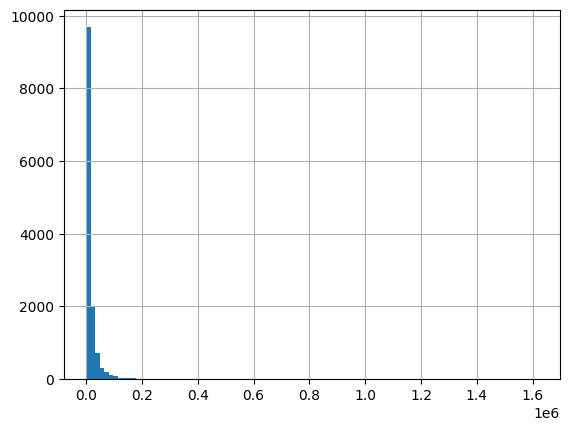

In [12]:
# make a histogram distribution of prec_y
df['prec_y'].hist(bins=100)
                  
# print the number of values in each bin of the histogram
print(df['prec_y'].value_counts(bins=100))

# print the std and mean of the prec_y values
print(df['prec_y'].std())
print(df['prec_y'].mean())

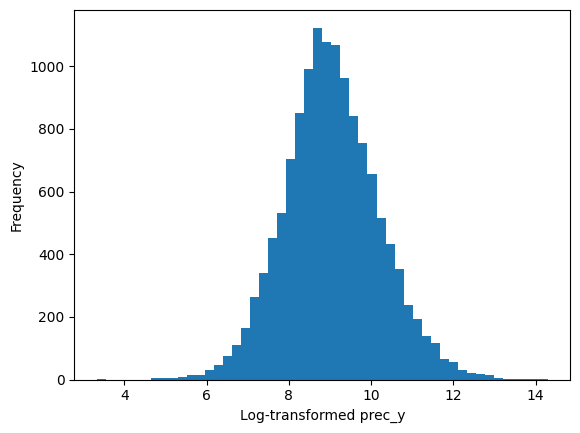

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df['prec_y'] is your precursor intensity data
df['log_prec_y'] = np.log1p(df['prec_y'])  # Log transform using log(1 + x) to handle zero values

# Plot the log-transformed histogram
plt.hist(df['log_prec_y'], bins=50)
plt.xlabel('Log-transformed prec_y')
plt.ylabel('Frequency')
plt.show()

In [14]:
# remove outliers that are more than 3 std away from the mean or less than 3 std away from the mean
df = df[(df['log_prec_y'] > df['log_prec_y'].mean() - 3 * df['log_prec_y'].std()) & 
        (df['log_prec_y'] < df['log_prec_y'].mean() + 3 * df['log_prec_y'].std())]

In [15]:
# remove the prec_y column
df = df.drop(columns=['prec_y'])

# normalize the log_prec_y from 0 to 1
df['log_prec_y'] = (df['log_prec_y'] - df['log_prec_y'].min()) / (df['log_prec_y'].max() - df['log_prec_y'].min())

In [16]:
df.to_csv('/Users/rishabjain/Desktop/Research/choformer/expression/data/dna/OneOmics_CHO_Global_Spectral_Library_cleaned.csv', index = False)

In [1]:
import pandas as pd
from Bio import Entrez
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
from urllib.error import HTTPError
import os

# Set your email and API key for NCBI API usage
Entrez.email = "your_email@example.com"
Entrez.api_key = "088cbd95eff8d7c195d3adcef2b9ff9f890a"

# Retry and delay settings
RETRY_LIMIT = 3
RETRY_DELAY = 5  # seconds to wait between retries
REQUEST_DELAY = 0.2  # seconds to wait between requests (to handle rate limiting)

# Paths for input and output
input_file = '/Users/rishabjain/Desktop/Research/choformer/expression/data/dna/OneOmics_CHO_Global_Spectral_Library_cleaned.csv'
output_file = '/Users/rishabjain/Desktop/Research/choformer/expression/data/dna/OneOmics_CHO_Global_Spectral_Library_with_gene_ids.csv'
checkpoint_file = '/Users/rishabjain/Desktop/Research/choformer/expression/data/dna/checkpoint.csv'

def fetch_gene_id_from_uniprot(uniprot_id, organism="Cricetulus griseus"):
    """
    Fetch the Gene ID from a UniProt protein ID using NCBI's gene database.
    """
    for attempt in range(RETRY_LIMIT):
        try:
            # Extract the UniProt protein accession (like NP_001230905.1)
            protein_id = uniprot_id.split("|")[1]
            
            # Create a more specific search query by including the organism
            search_term = f"{protein_id}[Protein Accession] AND {organism}[Organism]"
            
            # Search for the gene using the protein ID and organism
            handle = Entrez.esearch(db="gene", term=search_term, retmode="xml")
            record = Entrez.read(handle)
            handle.close()
            
            # Add a small delay between requests to avoid hitting the rate limit
            time.sleep(REQUEST_DELAY)
            
            if record['IdList']:
                # Return the Gene ID
                return record['IdList'][0]
            else:
                print(f"No Gene ID found for {uniprot_id}.")
                return None
        except HTTPError as e:
            if e.code == 429:  # Too Many Requests
                print(f"HTTP Error 429: Too Many Requests for {uniprot_id}, retrying in {RETRY_DELAY} seconds...")
                time.sleep(RETRY_DELAY)
            else:
                print(f"HTTP Error {e.code} fetching Gene ID for {uniprot_id}: {e.reason}")
            return None
        except Exception as e:
            print(f"Error fetching Gene ID for {uniprot_id}: {str(e)}")
            return None

def process_uniprot_id(row):
    """
    Process a row to fetch the Gene ID based on the uniprot_id field.
    """
    uniprot_id = row['uniprot_id']
    gene_id = fetch_gene_id_from_uniprot(uniprot_id)
    return row['uniprot_id'], gene_id

def save_progress(data, file):
    """
    Save the current progress to a checkpoint file.
    """
    data.to_csv(file, index=False)
    print(f"Progress saved to {file}")

# Load the input CSV file
data = pd.read_csv(input_file)

# Check if a checkpoint file exists
if os.path.exists(checkpoint_file):
    # Load the checkpoint file and merge it with the original data
    checkpoint_data = pd.read_csv(checkpoint_file)
    data['Gene ID'] = checkpoint_data['Gene ID']
    print(f"Resuming from checkpoint {checkpoint_file}")
else:
    # Add new column for Gene ID if no checkpoint exists
    data['Gene ID'] = None

# Create a ThreadPoolExecutor to fetch the gene IDs in parallel
with ThreadPoolExecutor(max_workers=10) as executor:
    # Submit tasks for parallel execution
    future_to_uniprot = {executor.submit(process_uniprot_id, row): row for _, row in data.iterrows() if pd.isna(row['Gene ID'])}
    
    for future in as_completed(future_to_uniprot):
        try:
            uniprot_id, gene_id = future.result()
            # Update the DataFrame with the gene ID
            data.loc[data['uniprot_id'] == uniprot_id, 'Gene ID'] = gene_id
            print(f"Processed {uniprot_id}, Gene ID: {gene_id}")
        except Exception as e:
            print(f"Error in future result: {str(e)}")
        
        # Periodically save progress to checkpoint file
        save_progress(data, checkpoint_file)

# Save the updated DataFrame with gene IDs to the output CSV
data.to_csv(output_file, index=False)
print(f"Final data with Gene IDs saved to {output_file}")

# Remove the checkpoint file once the job is completed
if os.path.exists(checkpoint_file):
    os.remove(checkpoint_file)
    print(f"Checkpoint file {checkpoint_file} removed.")

Processed rs|NP_001230915.1|NP_001230915.1, Gene ID: 100682534
Progress saved to /Users/rishabjain/Desktop/Research/choformer/expression/data/dna/checkpoint.csv
Processed rs|NP_001230906.1|NP_001230906.1, Gene ID: 100682526
Progress saved to /Users/rishabjain/Desktop/Research/choformer/expression/data/dna/checkpoint.csv
Processed rs|NP_001230917.1|NP_001230917.1, Gene ID: 100682536
Progress saved to /Users/rishabjain/Desktop/Research/choformer/expression/data/dna/checkpoint.csv
Processed rs|NP_001230912.1|NP_001230912.1, Gene ID: 100682533
Progress saved to /Users/rishabjain/Desktop/Research/choformer/expression/data/dna/checkpoint.csv
Processed rs|NP_001230905.1|NP_001230905.1, Gene ID: 100682525
Progress saved to /Users/rishabjain/Desktop/Research/choformer/expression/data/dna/checkpoint.csv
Processed rs|NP_001230909.1|NP_001230909.1, Gene ID: 100682529
Progress saved to /Users/rishabjain/Desktop/Research/choformer/expression/data/dna/checkpoint.csv
Processed rs|NP_001230908.1|NP_001

In [ ]:
import pandas as pd
from Bio import Entrez
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
from urllib.error import HTTPError

# Set your email and API key for NCBI API usage
Entrez.email = "your_email@example.com"
Entrez.api_key = "088cbd95eff8d7c195d3adcef2b9ff9f890a"

# Retry and delay settings
RETRY_LIMIT = 3
RETRY_DELAY = 5  # seconds to wait between retries
REQUEST_DELAY = 0.2  # seconds to wait between requests (to handle rate limiting)

def fetch_gene_id_from_uniprot(uniprot_id, organism="Cricetulus griseus"):
    """
    Fetch the Gene ID from a UniProt protein ID using NCBI's gene database.
    """
    for attempt in range(RETRY_LIMIT):
        try:
            # Extract the UniProt protein accession (like NP_001230905.1)
            protein_id = uniprot_id.split("|")[1]
            
            # Create a more specific search query by including the organism
            search_term = f"{protein_id}[Protein Accession] AND {organism}[Organism]"
            
            # Search for the gene using the protein ID and organism
            handle = Entrez.esearch(db="gene", term=search_term, retmode="xml")
            record = Entrez.read(handle)
            handle.close()
            
            # Add a small delay between requests to avoid hitting the rate limit
            time.sleep(REQUEST_DELAY)
            
            if record['IdList']:
                # Return the Gene ID
                return record['IdList'][0]
            else:
                print(f"No Gene ID found for {uniprot_id}.")
                return 'black'
        except HTTPError as e:
            if e.code == 429:  # Too Many Requests
                print(f"HTTP Error 429: Too Many Requests for {uniprot_id}, retrying in {RETRY_DELAY} seconds...")
                time.sleep(RETRY_DELAY)
            else:
                print(f"HTTP Error {e.code} fetching Gene ID for {uniprot_id}: {e.reason}")
            return None
        except Exception as e:
            print(f"Error fetching Gene ID for {uniprot_id}: {str(e)}")
            return None

def process_uniprot_id(row):
    """
    Process a row to fetch the Gene ID based on the uniprot_id field.
    """
    uniprot_id = row['uniprot_id']
    gene_id = fetch_gene_id_from_uniprot(uniprot_id)
    return row['uniprot_id'], gene_id

# Load the CSV file that has missing Gene IDs
input_file = '/Users/rishabjain/Desktop/Research/choformer/expression/data/dna/OneOmics_CHO_Global_Spectral_Library_with_gene_ids_filled2.csv'
data = pd.read_csv(input_file)

# Only select rows where 'Gene ID' is missing (either NaN or empty)
missing_gene_ids = data[data['Gene ID'].isna() | (data['Gene ID'] == '')]

# get total number missing
print(missing_gene_ids.shape)

if not missing_gene_ids.empty:
    # Create a ThreadPoolExecutor to fetch the missing gene IDs in parallel
    with ThreadPoolExecutor(max_workers=10) as executor:
        # Submit tasks for parallel execution
        future_to_uniprot = {executor.submit(process_uniprot_id, row): row for _, row in missing_gene_ids.iterrows()}
        
        for future in as_completed(future_to_uniprot):
            uniprot_id, gene_id = future.result()
            
            # Update the DataFrame with the gene ID
            data.loc[data['uniprot_id'] == uniprot_id, 'Gene ID'] = gene_id

    # Save the updated DataFrame with missing gene IDs filled in
    output_file = '/Users/rishabjain/Desktop/Research/choformer/expression/data/dna/OneOmics_CHO_Global_Spectral_Library_with_gene_ids_filled3.csv'
    data.to_csv(output_file, index=False)

else:
    print("No missing Gene IDs found.")

(2188, 3)


/var/folders/ff/pbhg09jd53nb6lhsv863ym9c0000gn/T/ipykernel_48433/4173386803.py:81: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100689268' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['uniprot_id'] == uniprot_id, 'Gene ID'] = gene_id


No Gene ID found for rs|XP_027242348.1|XP_027242348.1.No Gene ID found for rs|NP_001233648.1|NP_001233648.1.

HTTP Error 429: Too Many Requests for rs|XP_027242356.1|XP_027242356.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242370.1|XP_027242370.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242536.1|XP_027242536.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242563.1|XP_027242563.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242659.1|XP_027242659.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242547.1|XP_027242547.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242448.1|XP_027242448.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242519.1|XP_027242519.1, retrying in 5 seconds...
HTTP Error 429: Too Many Requests for rs|XP_027242469.1|XP_027242469.1, retrying in 5 seconds...
HTTP Error 429: T